We will analyse the dataset to identify:

1. Data Description
2. Missing values
3. Numerical variables
4. Distribution of the numerical variables
5. Outliers
6. Categorical variables
7. Cardinality of the categorical variables
Potential relationship between the variables and the target: price

## House Rent dataset: Data Analysis

In the following cells, we will analyse the variables of the House Rent Dataset from iNeuron. We will go through the different aspects of the analysis of the variables.

Let's go ahead and load the dataset.

In [4]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

### Data Import

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/PES1UG20CS594/da_project/housing_train.csv')
data.shape

(265190, 22)

The house price dataset contains 265,190 rows, i.e., houses, and 22 columns, i.e., variables. 

## Data Description

#### *Show data header*

In [6]:
data.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [7]:
data.tail()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,1,1,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.0495,-83.0669,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,1,1,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh
265187,7044801015,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1507,apartment,1660,2,1.5,1,1,1,0,0,0,NaN,NaN,https://images.craigslist.org/00j0j_5EIRWzdHCV...,"The Commons at Olentangy4765 Blairfield Dr, Co...",40.0564,-83.0417,oh
265188,7050885800,https://columbus.craigslist.org/apa/d/newark-l...,columbus,https://columbus.craigslist.org,1001,apartment,1220,3,1.5,1,1,1,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_6VSTqFJb86...,www.McMillenWoods.com www.mcmillenwoods.com ...,40.0451,-82.4564,oh
265189,7050884586,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1164,townhouse,1300,2,2.5,1,1,0,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/00w0w_h1L3gxb8rG...,Park Club apartments is offering some of the B...,NaN,NaN,NaN


#### *Data Information*

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

There are 13 numerical features and 9 categorical features.

#### *Data columns*

In [9]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

#### *Show statistical analysis of our dataset*

Let's show min, max, std, and count of each numerical variables in the dataset

In [10]:
data.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,7.040888e+09,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,8.778930e+06,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035963e+09,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,7.043109e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,7.048362e+09,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


## Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

#### *Show if there are missing datapoints*

In [11]:
data.isna().mean().sort_values(ascending=False)

parking_options            0.358743
laundry_options            0.204800
long                       0.005351
lat                        0.005351
description                0.000008
state                      0.000004
url                        0.000000
image_url                  0.000000
comes_furnished            0.000000
electric_vehicle_charge    0.000000
wheelchair_access          0.000000
id                         0.000000
dogs_allowed               0.000000
cats_allowed               0.000000
baths                      0.000000
beds                       0.000000
sqfeet                     0.000000
type                       0.000000
price                      0.000000
region_url                 0.000000
region                     0.000000
smoking_allowed            0.000000
dtype: float64

Variables containing missing values:-
- parking_options (36%)
- laundry_options (20%)
- lat (0.5%)
- long (0.5%)
- description & state (nominal percentage)

**Heat Map**

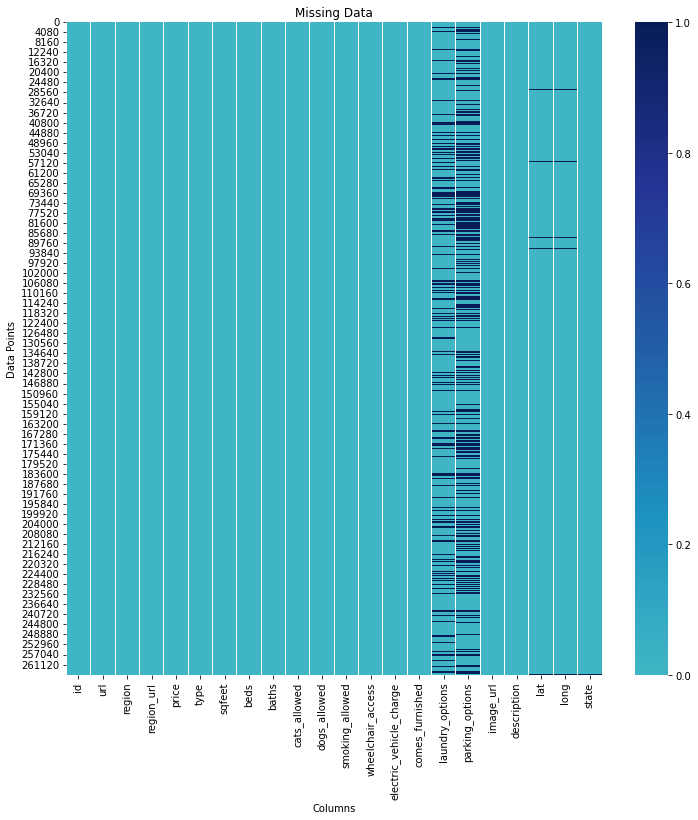

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.isnull(), ax=ax, cmap="YlGnBu", center=0).set(
            title = 'Missing Data', 
            xlabel = 'Columns', 
            ylabel = 'Data Points');

In [13]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
data[vars_with_na].isnull().mean()

laundry_options    0.204800
parking_options    0.358743
description        0.000008
lat                0.005351
long               0.005351
state              0.000004
dtype: float64

Our dataset contains a few variables with missing values. We need to account for this in our following notebook, where we will engineer the variables for use in Machine Learning Models.

#### Relationship between values being missing and price

Let's evaluate the price of the house in those observations where the information is missing, for each variable.

**Bar Plot**

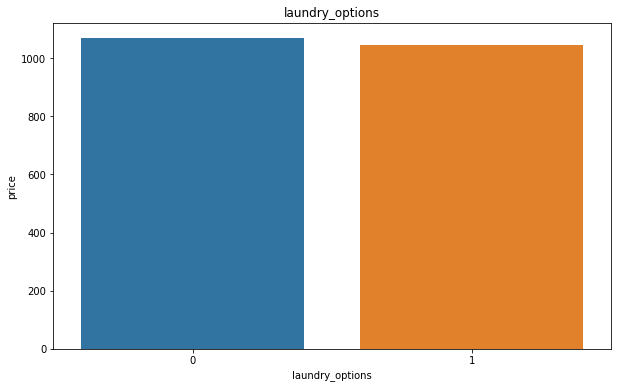

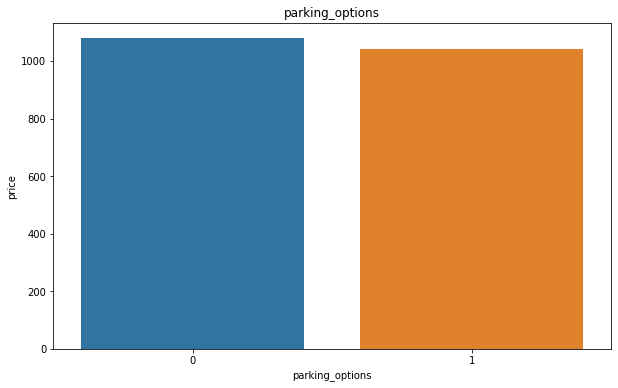

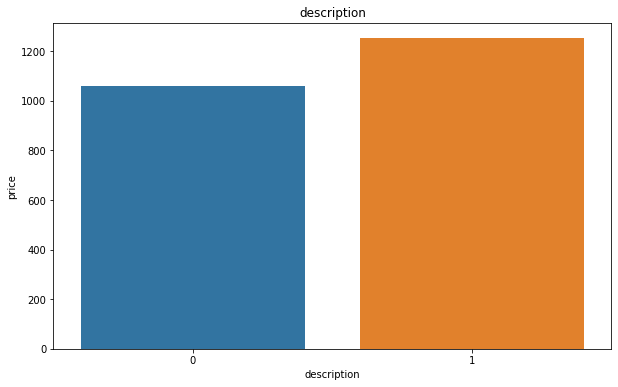

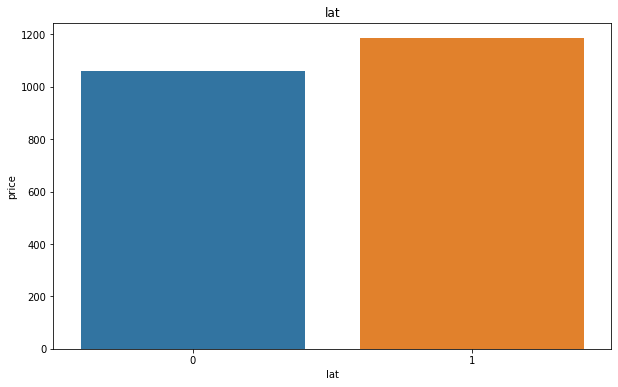

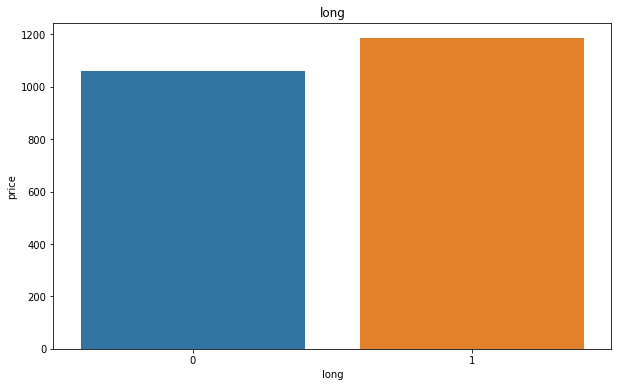

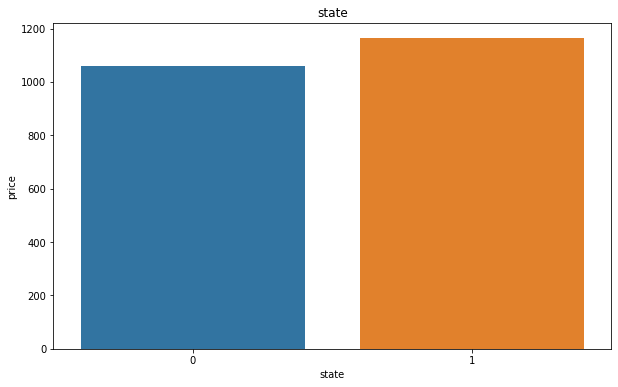

In [14]:
def analyse_na_value(df, var):
    df = df.copy()
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isna(), 1, 0)
    grs = df.groupby(var)['price'].median().reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x=grs[var], y=grs['price'])
    plt.title(var)
    plt.show()


# let's run the function on each variable with missing data
for var in vars_with_na:
    analyse_na_value(data, var)

The average rent price in houses where the information is missing, differs from the average rent price in houses where information exists. 

We will capture this information when we engineer the variables in our next pipeline

### Categorical variables

In [15]:
# make a list of the categorical variables that contain missing values

vars_with_na = [
    var for var in data.columns
    if data[var].isnull().sum() > 0 and data[var].dtypes == 'O'
]
print(vars_with_na)
data[vars_with_na].isna().mean()

['laundry_options', 'parking_options', 'description', 'state']


laundry_options    0.204800
parking_options    0.358743
description        0.000008
state              0.000004
dtype: float64

In [16]:
data[vars_with_na].head()

,laundry_options,parking_options,description,state
0,laundry on site,street parking,Apartments In Birmingham AL Welcome to 100 Inv...,al
1,laundry on site,off-street parking,Find Your Way to Haven Apartment Homes Come ho...,al
2,laundry on site,street parking,Apartments In Birmingham AL Welcome to 100 Inv...,al
3,laundry on site,street parking,Apartments In Birmingham AL Welcome to 100 Inv...,al
4,laundry on site,street parking,Apartments In Birmingham AL Welcome to 100 Inv...,al


***Description***

In [17]:
data.description[0]

'Apartments In Birmingham AL Welcome to 100 Inverness Apartment Homes, a luxury apartment community tucked away into one of the most coveted locations in the city for Birmingham apartments. Find stylish one-, two-, and three-bedroom apartment floor plans tailored to your wants and needs, complete with the amenities that are important to you. Our layouts come with just enough variety to enable you to make it your own haven unlike any other. Get inspired by our photos and the serenity of the nature surrounding you to let your aesthetic come together with our stylish, modern designs for a home you wonâ\x80\x99t be able to wait to show off to your guests. Even beyond style, our pet-friendly apartment community is also all about functionality! Some of our homes come with washer and dryer hookups, wood burning fireplaces, hardwood floors, and a private patio or balcony. All of our residents can make use of oversized walk-in closets, air conditioning, garages, a business center, on-site manag

While going through the description for the house records, I found some interesting information that can be used as a feature in determining the target. Like info about grilling, pool, fireplace etc can be a useful feature. We will look about this more in data cleaning pipeline

***State***

In [18]:
data[['region','state']].head(15)

,region,state
0,birmingham,al
1,birmingham,al
2,birmingham,al
3,birmingham,al
4,birmingham,al
5,birmingham,al
6,birmingham,al
7,birmingham,al
8,birmingham,al
9,birmingham,al


In [19]:
data.groupby('region')['state'].value_counts()

region                  state
SF bay area             ca       2327
akron / canton          oh       1532
albany                  ny       1244
                        ga        846
albuquerque             nm       2144
                                 ... 
winston-salem           nc       2123
worcester / central MA  ma       1452
yuba-sutter             ca        152
yuma                    az        215
zanesville / cambridge  oh          3
Name: state, Length: 310, dtype: int64

The state is highly related to the region. So filing the missing values of state with the mode value of state for that region.

***laundry_options***

In [20]:
data.groupby('type')['laundry_options'].value_counts()

type             laundry_options   
apartment        w/d in unit           73426
                 laundry on site       36440
                 w/d hookups           34418
                 laundry in bldg       25730
                 no laundry on site     1957
assisted living  laundry on site           1
condo            w/d in unit            2807
                 laundry in bldg         566
                 w/d hookups             332
                 laundry on site         324
                 no laundry on site       33
cottage/cabin    w/d in unit             303
                 laundry on site         119
                 no laundry on site      107
                 w/d hookups              78
                 laundry in bldg          31
duplex           w/d hookups            1340
                 w/d in unit            1326
                 laundry on site         242
                 laundry in bldg         219
                 no laundry on site      127
flat             w/

Filling in the missing laundry_options with the mode value of laundry_options for the type of the house.

***parking_options***

In [21]:
data.groupby('type')['parking_options'].value_counts()

type       parking_options   
apartment  off-street parking    74713
           carport               25035
           attached garage       13397
           detached garage        9415
           street parking         8672
                                 ...  
townhouse  carport                1072
           street parking          515
           detached garage         363
           no parking                6
           valet parking             3
Name: parking_options, Length: 69, dtype: int64

Same as landry_options, filling in the missing parking_options with the mode value of parking_options for the type of the house.

We will fill in the missing values in the notebook for Feature Engineering Pipeline

### Numerical variables


In [22]:
# make a list with the numerical variables that contain missing values
vars_with_na = [
    var for var in data.columns
    if data[var].isnull().sum() > 0 and data[var].dtypes != 'O'
]
print(vars_with_na)
# print percentage of missing values per variable
data[vars_with_na].isnull().mean()

['lat', 'long']


lat     0.005351
long    0.005351
dtype: float64

***lat***

In [23]:
data.groupby('region')['lat'].value_counts()

region                  lat    
SF bay area             37.7740    28
                        38.0087    21
                        37.2458    20
                        37.7752    17
                        38.1199    17
                                   ..
yuma                    32.7939     1
                        33.9776     1
zanesville / cambridge  39.8993     1
                        39.9274     1
                        40.1647     1
Name: lat, Length: 49528, dtype: int64

***long***

In [24]:
data.groupby('region')['long'].value_counts()

region                  long     
SF bay area             -122.3910    50
                        -122.2670    28
                        -122.2560    28
                        -122.0180    27
                        -121.9840    26
                                     ..
yuma                    -114.3850     1
                        -113.5030     1
zanesville / cambridge  -82.1295      1
                        -82.0041      1
                        -81.8345      1
Name: long, Length: 44898, dtype: int64

As we know lattitudes and longitudes tends to correspond to the region. So it will be appropriate to fill missing lattitudes and longitudes with the mode value for the region.

#### Boolean Variables

Extracting the boolean variables

In [25]:
bool_vars = [var for var in data if data[var].nunique() == 2]

data[bool_vars].head()

,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
0,1,1,1,0,0,0
1,1,1,1,0,0,0
2,1,1,1,0,0,0
3,1,1,1,0,0,0
4,1,1,1,0,0,0


In [26]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O' and var not in bool_vars]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  7


,id,price,sqfeet,beds,baths,lat,long
0,7039061606,1195,1908,3,2.0,33.4226,-86.7065
1,7041970863,1120,1319,3,2.0,33.3755,-86.8045
2,7041966914,825,1133,1,1.5,33.4226,-86.7065
3,7041966936,800,927,1,1.0,33.4226,-86.7065
4,7041966888,785,1047,2,1.0,33.4226,-86.7065


From the above view of the dataset, we notice the variable id, which is an indicator of the house. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each house in the dataset. See below:

In [27]:
print('Number of House Id labels: ', len(data.id.unique()))
print('Number of Houses in the Dataset: ', len(data))

Number of House Id labels:  265190
Number of Houses in the Dataset:  265190


Same goes for url and image_url, each house have different set of values for these features

## Geographical variables

Plotting lattitude and longitude to get more insights

**Scatter Plot**

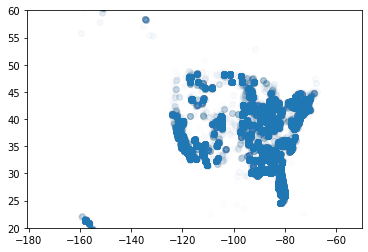

In [28]:
plt.scatter(x=data['long'], y=data['lat'],alpha=0.01)
plt.xlim(right=-50)
plt.ylim(bottom=20,top=60)
plt.show()

**Shapely geometry**

In [67]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.4 MB/s 
     |████████████████████████████████| 16.7 MB 48.4 MB/s 
     |████████████████████████████████| 6.3 MB 38.1 MB/s 


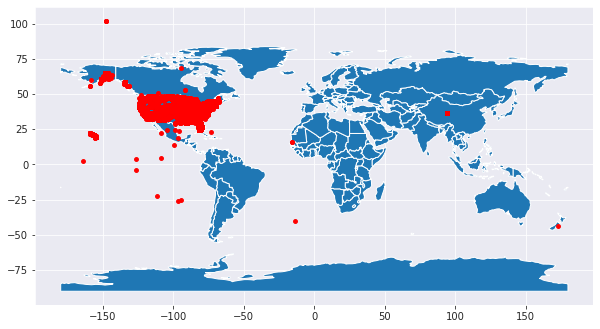

In [68]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

From the above map it is clear that most of the houses are from the united states. 
Which are in between longitudes -130 to -50 and lattitudes 20 to 50

## Numerical Features

### Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [30]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in ['id', 'price']]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [31]:
# let's visualise the discrete variables

data[discrete_vars].head()

,beds,baths
0,3,2.0
1,3,2.0
2,1,1.5
3,1,1.0
4,2,1.0


These discrete variables refer to the number of rooms and bathrooms.
Let's go ahead and analyse their contribution to the house price.

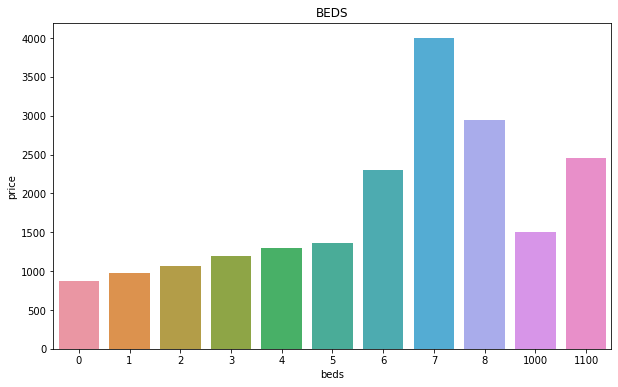

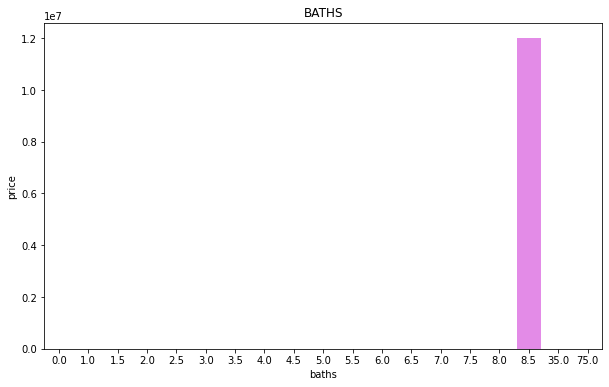

In [32]:
def analyse_discrete(df, var):
    df = df.copy()
    grs = df.groupby(var)['price'].median().reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x=grs[var], y=grs['price'])
    plt.title(var.upper())
    plt.show()
    
    
for var in discrete_vars:
    analyse_discrete(data, var)

There tend to be a relationship between the variables values and the price, but this relationship is not always monotonic. 

For example, for beds, there is a monotonic relationship: the higher the quantity, the higher the price.  

However, for baths, the relationship is not monotonic. Clearly, some baths number, like 8.5, correlate with higher sale prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract maximum value for a linear model.

### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete variables in our dataset.

In [33]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+['id']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  4


In [34]:
# let's visualise the continuous variables

data[cont_vars].head()

,price,sqfeet,lat,long
0,1195,1908,33.4226,-86.7065
1,1120,1319,33.3755,-86.8045
2,825,1133,33.4226,-86.7065
3,800,927,33.4226,-86.7065
4,785,1047,33.4226,-86.7065


**Dist Plot before log transformation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


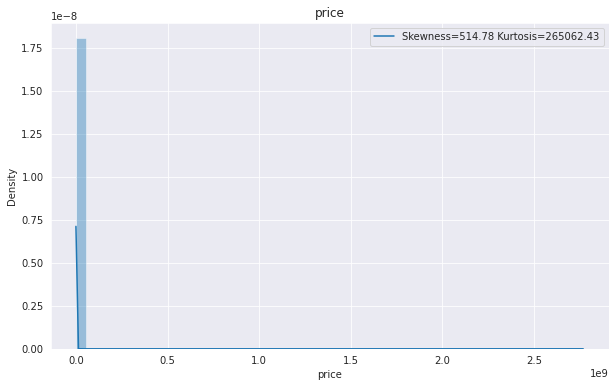

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


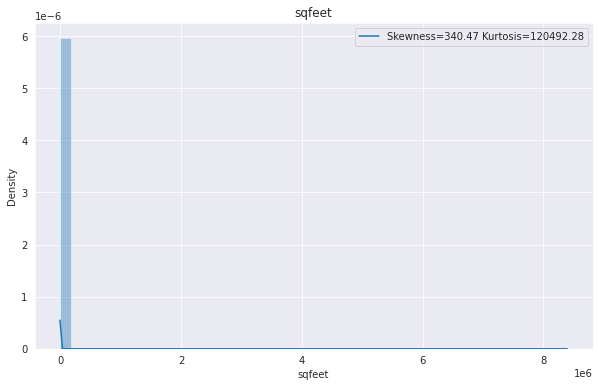

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


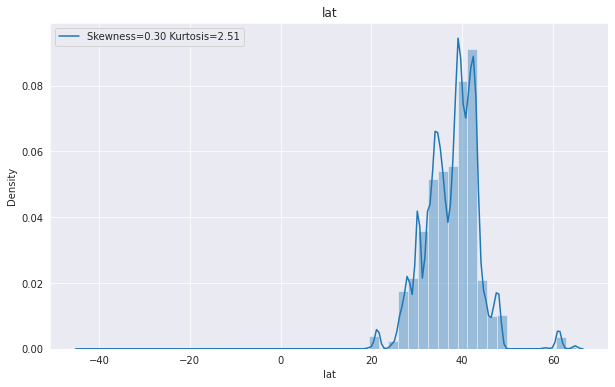

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


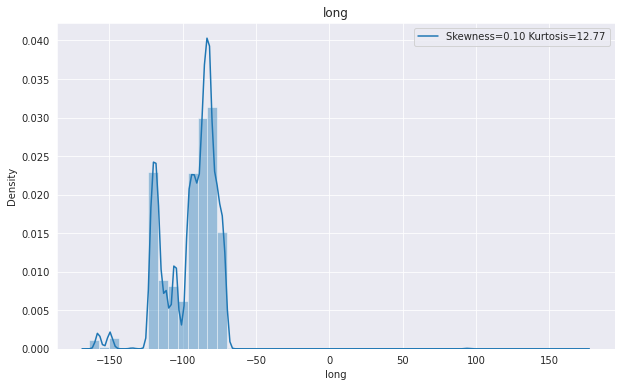

In [35]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continuous(df, var):
    df = df.copy()  
    df = df.dropna(axis=0)
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(df[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            data[var].skew(), 
            data[var].kurt())
        ],
        loc='best')
    plt.title(var)
    plt.show()

for var in cont_vars:
    analyse_continuous(data, var)

The variables are not normally distributed, including the target variable 'price'. 

To maximise performance of linear models, we need to account for non-Gaussian distributions. We will transform our variables in the next lecture / video, during our feature engineering step.

Let's evaluate if a logarithmic transformation of the variables returns values that follow a normal distribution:

**Dist Plot after log transformation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


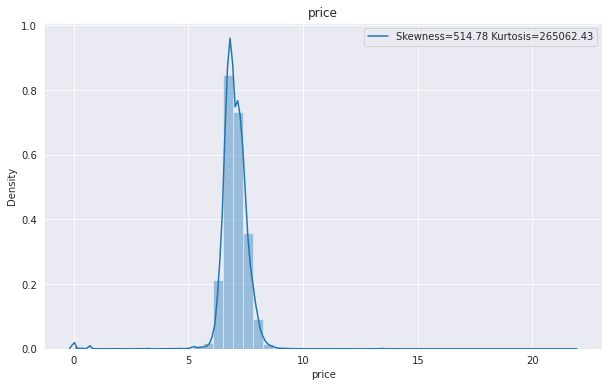

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


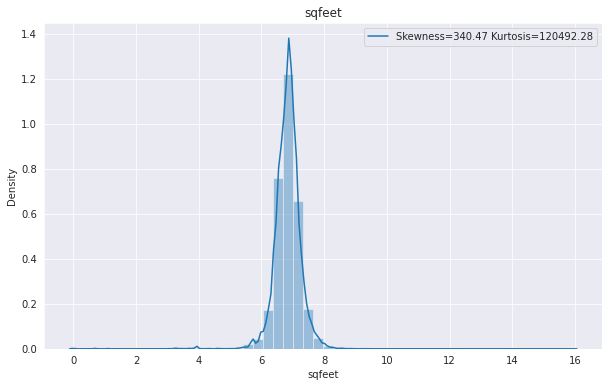

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


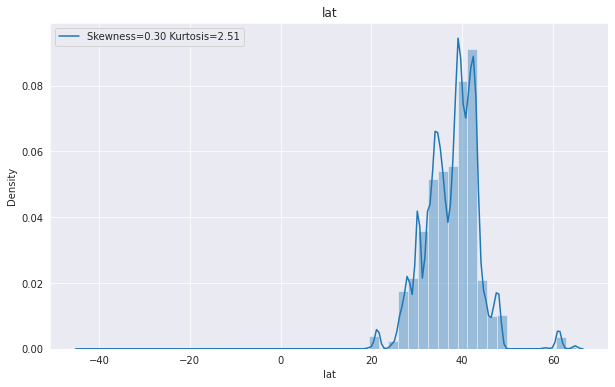

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


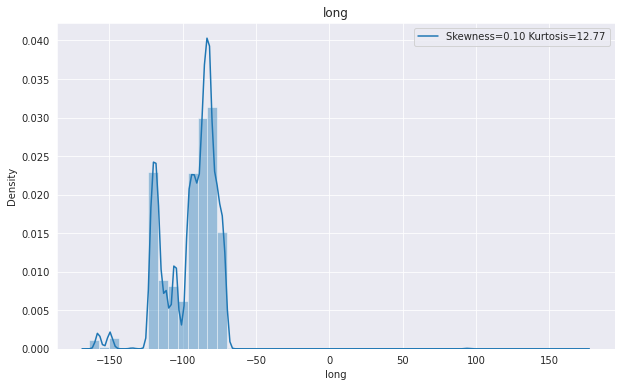

In [36]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation
def analyse_transformed_continuous(df, var):
    df = df.copy()
    df = df.dropna(axis=0)

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if var == 'lat' or var == 'long':
        pass
    else:
        # log transform the variable
        df[var] = np.log1p(df[var])
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(df[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            data[var].skew(), 
            data[var].kurt())
        ],
        loc='best')
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_transformed_continuous(data, var)

We get a better spread of the values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

From the previous plots, we observe some monotonic associations between price and the variables to which we applied the log transformation, for example 'sqfeet'.

## Outliers

Extreme values may affect the performance of a linear model. Let's find out if we have any in our variables.

**Box Plot**

 Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


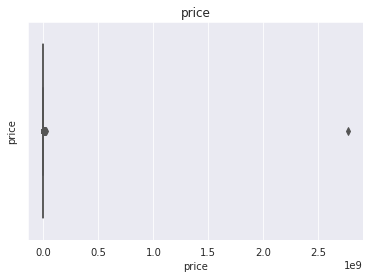

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


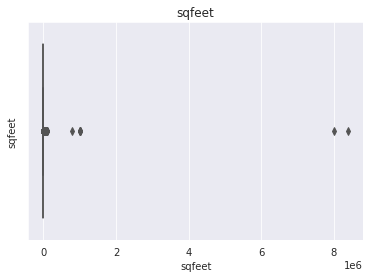

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


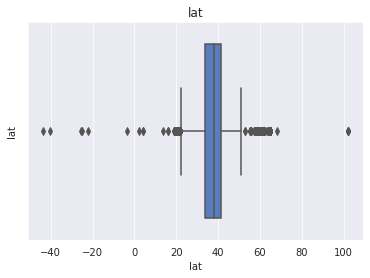

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


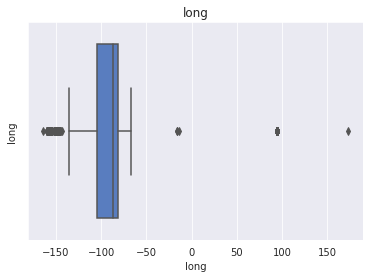

In [37]:
# let's make boxplots to visualise outliers in the continuous variables


def find_outliers(df, var):
    df = df.copy()

    # log does not take negative values, so let's be
    # careful and skip those variables
    if var == 'lat' or var == 'long':
        pass
    else:
        # log transform the variable
        df[var] = np.log1p(df[var])
    ax = sns.boxplot(x=data[var], palette="muted", orient="vertical")
    plt.title(var)
    plt.ylabel(var)
    plt.show()


for var in cont_vars:
    find_outliers(data, var)

The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. So it is worth spending some time understanding if removing outliers will add performance value to our  final machine learning model.

### Let's explore these outliers


Methods for exploring outliers

### IQR

In [38]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

### Standard Deviation

In [39]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Exploring outliers in the variables

## price

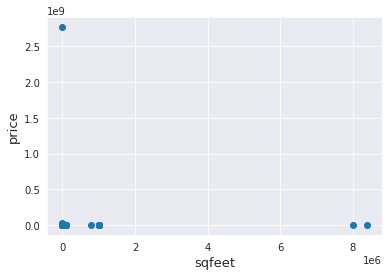

In [40]:

fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large sqfeet that are of a low price. Also one at the top left with extremely small sqfeet that are of high price. These values are huge oultliers.

#### IQR

In [41]:
out_iqr(data, 'price')

The IQR is 633.0
The lower bound value is -132.5
The upper bound value is 2399.5
Total number of outliers are 13423


#### STD

In [42]:
out_std(data,'price')

The lower bound value is -16116782.293361256
The upper bound value is 16141328.000544785
Total number of outliers are 4


## sqfeet

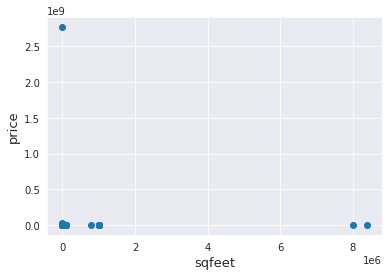

In [43]:

fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large sqfeet that are of a low price. Also one at the top left with extremely small sqfeet that are of high price. These values are huge oultliers.

#### IQR

In [44]:
out_iqr(data, 'sqfeet')

The IQR is 404.0
The lower bound value is 146.0
The upper bound value is 1762.0
Total number of outliers are 11212


#### STD

In [45]:
out_std(data,'sqfeet')

The lower bound value is -68112.94842085856
The upper bound value is 70300.30499539003
Total number of outliers are 15


##   beds

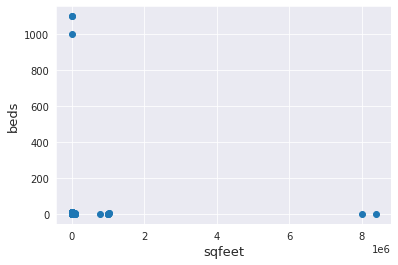

In [46]:

fig, ax = plt.subplots()
ax.scatter(x = data['sqfeet'], y = data['beds'])
plt.ylabel('beds', fontsize=13)
plt.xlabel('sqfeet', fontsize=13)
plt.show()

#### IQR

In [47]:
out_iqr(data, 'beds')

The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 10017


#### STD

In [48]:
out_std(data,'beds')

The lower bound value is -9.16328511531282
The upper bound value is 12.988112597495409
Total number of outliers are 3


## baths

#### IQR

In [49]:
out_iqr(data, 'baths')

The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 1459


#### STD

In [50]:
out_std(data,'baths')

The lower bound value is -0.4071555381027412
The upper bound value is 3.3740924512593455
Total number of outliers are 2111


## lat

#### IQR

In [51]:
out_iqr(data.dropna(axis=0), 'lat')

The IQR is 7.6229999999999976
The lower bound value is 22.545000000000005
The upper bound value is 53.03699999999999
Total number of outliers are 3148


## long

#### IQR

In [52]:
out_iqr(data.dropna(axis=0), 'long')

The IQR is 24.2624
The lower bound value is -142.2626
The upper bound value is -45.213
Total number of outliers are 3110


We will be using interquartile range to remove the outliers. As with other methods the upper and lower bounds were irrelevant.

## Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [53]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  9


In [54]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,url,region,region_url,type,laundry_options,parking_options,image_url,description,state
0,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,apartment,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,al
1,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,apartment,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,al
2,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,apartment,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,al
3,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,apartment,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,al
4,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,apartment,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,al


#### Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [55]:
data[cat_vars].nunique().sort_values(ascending=False)

url                265190
description        195471
image_url          125141
region_url            305
region                298
state                  38
type                   12
parking_options         7
laundry_options         5
dtype: int64

In [56]:
data[cat_vars].nunique() / len(data)

url                1.000000
region             0.001124
region_url         0.001150
type               0.000045
laundry_options    0.000019
parking_options    0.000026
image_url          0.471892
description        0.737098
state              0.000143
dtype: float64

Variables like url, image_url, description has high cardinality. It is worth mentioning that each of houses may have differt values for these variables. Hence the high cardinality. So it okay to remove these. Also region_url contains the region, so dropping region_url will not affect our model.

In [57]:
# recapture categorical variables in a list
cat_vars = [var for var in cat_vars if var not in ['url', 'image_url', 'description', 'region_url']]

In [58]:
data[cat_vars].nunique()

region             298
type                12
laundry_options      5
parking_options      7
state               38
dtype: int64

All the categorical variables show low cardinality(except region), this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

#### Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [59]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['price'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

region
SF bay area               0.008775
akron / canton            0.005777
albany                    0.007881
albuquerque               0.008085
ames                      0.001358
                            ...   
winston-salem             0.008006
worcester / central MA    0.005475
yuba-sutter               0.000573
yuma                      0.000811
zanesville / cambridge    0.000011
Name: price, Length: 293, dtype: float64

type
assisted living    0.000004
cottage/cabin      0.002647
flat               0.001316
in-law             0.000547
land               0.000015
loft               0.001927
Name: price, dtype: float64

laundry_options
no laundry on site    0.00962
Name: price, dtype: float64

parking_options
no parking       0.00744
valet parking    0.00046
Name: price, dtype: float64

state
ak    0.008179
dc    0.009435
de    0.007723
hi    0.006938
me    0.001584
mo    0.008138
mt    0.005049
nh    0.006641
ok    0.000185
or    0.000166
Name: price, dtype: float64



Some of the categorical variables show multiple labels that are present in less than 1% of the houses. We will engineer these variables in our next notebook. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. That is why we want to remove them.

### frequent labels

In [60]:
def find_frequent_labels(df, var, rare_perc):
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['price'].count() / len(df)
    return tmp[tmp > rare_perc].index.values

frequent_ls = {}
for var in cat_vars:
    frequent_ls[var] = find_frequent_labels(data, var, 0.01)
    
frequent_ls

{'region': array(['denver', 'fayetteville', 'jacksonville', 'omaha / council bluffs',
        'rochester'], dtype=object),
 'type': array(['apartment', 'condo', 'duplex', 'house', 'manufactured',
        'townhouse'], dtype=object),
 'laundry_options': array(['laundry in bldg', 'laundry on site', 'w/d hookups', 'w/d in unit'],
       dtype=object),
 'parking_options': array(['attached garage', 'carport', 'detached garage',
        'off-street parking', 'street parking'], dtype=object),
 'state': array(['al', 'ar', 'az', 'ca', 'co', 'ct', 'fl', 'ga', 'ia', 'id', 'il',
        'in', 'ks', 'ky', 'la', 'ma', 'md', 'mi', 'mn', 'ms', 'nc', 'nd',
        'ne', 'nj', 'nm', 'nv', 'ny', 'oh'], dtype=object)}

These are the frequent labels for the categorical variables that we are going to keep.

## type

***Pie Plot***

In [61]:
grdsp = data.groupby(["type"])[["price"]].mean().reset_index()

fig = px.pie(grdsp,
             values="price",
             names="type",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

We can see that the majority of the houses are of type apartment with around 50.2% of the total records.<br>
The mean price for the type apartment is around 14,544.

## state

In [62]:
data['state'].value_counts().sort_values(ascending=False)

ca    33085
fl    31929
nc    18628
mi    14529
ga    13841
co    11308
ny     9991
il     9706
ks     7910
ia     7488
mn     7468
md     7451
la     7304
az     6752
oh     6558
in     6416
al     6198
nj     5711
ky     5419
ms     4973
ma     4926
id     4466
ct     3765
nd     3428
ar     3149
nm     2917
nv     2846
ne     2697
dc     2502
ak     2169
mo     2158
de     2048
hi     1840
nh     1761
mt     1339
me      420
ok       49
or       44
Name: state, dtype: int64

***Scatter Plot***

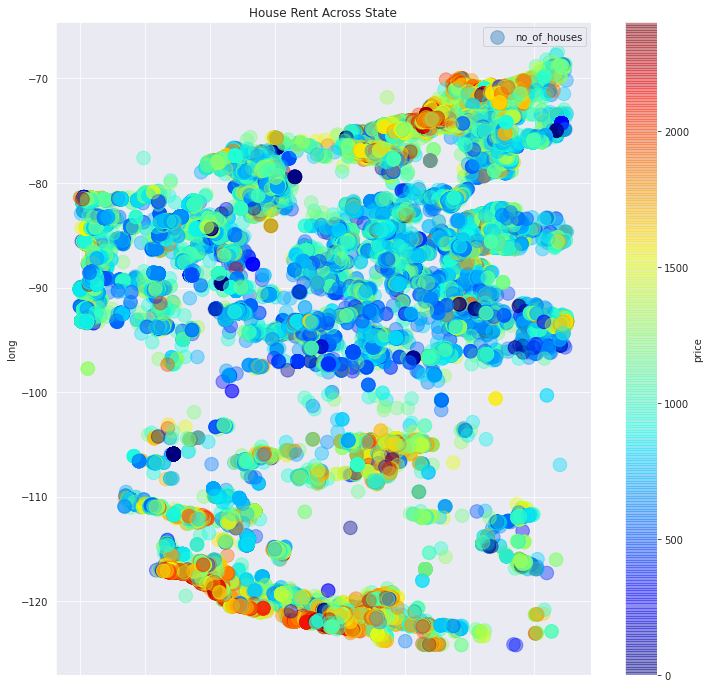

In [63]:
df = data[((data['long']>-125) & (data['long']<-45)) & ((data['lat']>30) & (data['lat']<45))]
df = df[df.price<2400]
df.plot(kind="scatter", x="lat", y="long", alpha=0.4, 
        s=df["state"].value_counts()[1]/100, label="no_of_houses", 
        c="price", cmap=plt.get_cmap("jet"), colorbar=True,
       figsize=(12,12))
plt.title('House Rent Across State')
plt.legend()

The radius of each circle represents the state’s house count (option s), and the color represents the price (option c). The range is from blue (low values) to red (high prices):

## region

In [64]:
data['region'].value_counts().sort_values(ascending=False)

jacksonville              4246
rochester                 3677
fayetteville              3652
omaha / council bluffs    2727
denver                    2671
                          ... 
corvallis/albany             3
kansas city                  3
northwest OK                 2
east oregon                  1
texoma                       1
Name: region, Length: 298, dtype: int64

***Scatter Plot***

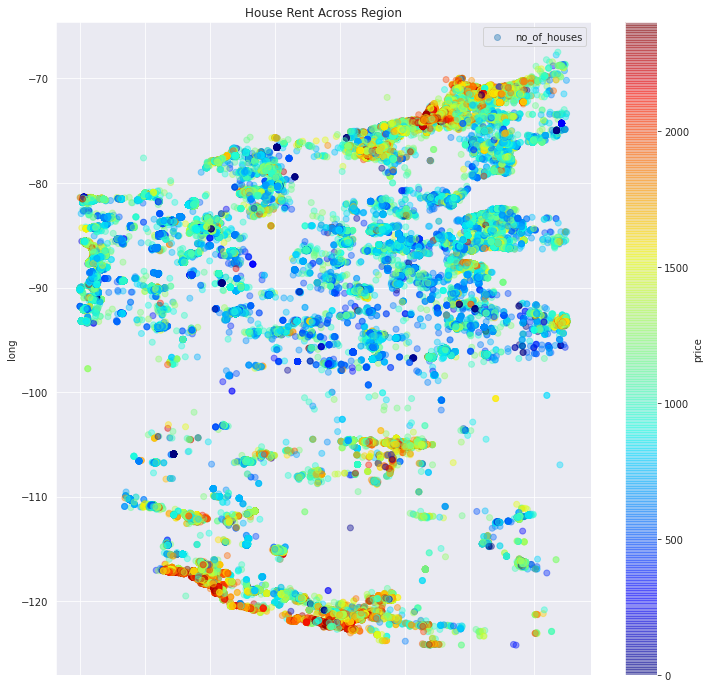

In [65]:
df = data[((data['long']>-125) & (data['long']<-45)) & ((data['lat']>30) & (data['lat']<45))]
df = df[df.price<2400]
df.plot(kind="scatter", x="lat", y="long", alpha=0.4, 
        s=df["region"].value_counts()[1]/100, label="no_of_houses", 
        c="price", cmap=plt.get_cmap("jet"), colorbar=True,
        figsize=(12,12))
plt.title('House Rent Across Region')
plt.legend()

The radius of each circle represents the region’s house count (option s), and the color represents the price (option c). The range is from blue (low values) to red (high prices):

## Correlation

***Correlation Heatmap***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



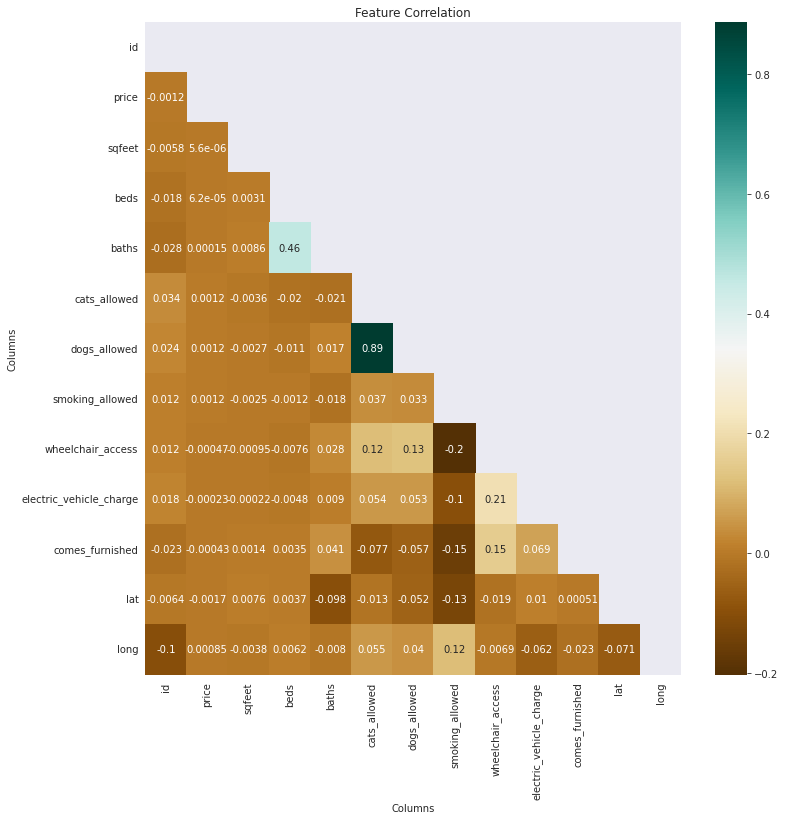

In [66]:
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

fig, ax = plt.subplots(figsize=(12,12)) 

sns.heatmap(corr_matrix, 
            annot=True, 
            mask=mask,
            ax=ax, 
            cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

There's hardly any correlation among the independent and dependent features.

Some insights from the above correlation heatmap:

1. expected stronge correlation between beds and baths
2. unexpected correlation between smoking_allowed and lat
3. unexpected correlation between smoking_allowed and infant_mortality
4. expected stronge correlation between cats_allowed and dogs_allowed

# Conclusion

## 1. Data Description:

The house price dataset contains 265,190 rows, i.e., houses, and 22 columns, i.e., variables. <br>
There are 13 numerical features and 9 categorical features.

## 2. Missing Values:
Following variables consist missing values.
- parking_options (36%)
- laundry_options (20%)
- lat (0.5%)
- long (0.5%)
- description & state (nominal percentage)

**Imputate missing values:**

variables | imputation 
--- | ---
parking_options | mode value of the parking_options for the respective house type
laundry_options | mode value of the laundry_options for the respective house type
lat | mode value of the lattitude for the respective house region
long | mode value of the longitude for the respective house region
state | drop records
description | drop records


***Note***: Description column can be explored more to get intriguing new features. For example: having pool, fireplace, grilling place, gym nearby etc.

## 3. Numerical variables:

Numerical variables are: <br>
    
    ['price', 'sqfeet', 'beds', 'baths', 'lat', 'long']

Boolean variables are: <br>
    
    ['cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 
    'comes_furnished']

Discrete variables are: <br>
    
    ['beds', 'baths']

Continuous variables are: <br>
    
    ['price', 'sqfeet', 'lat', 'long']

## 4. Distribution of Numerical Variables

All the numerical variables, except lat and long are skewed. Log transformation found to be useful while analysis the data.

## 5. Outliers

All the numerical variables contain huge outliers. While doing EDA, we decided to remove the outliers with the help of interquartile range.

variables | no of outliers | upper bound | lower bound 
--- | --- | --- | ---
price | 13423 | 2400 | 1
sqfeet | 11212 | 1762 | 146
beds | 10017 | 3 | 1
baths | 1459 | 3 | 1
lat | 3148 | 53 | 23
long | 3110 | -45 | -142

## 6. Categorical Variables

The categorical features are: <br>

    ['region', 'type', 'laundry_options', 'parking_options', 'state']
       
These variables contain all text: <br>
    
    ['url', 'region_url', 'image_url', 'description']

The frequent labels for the categorical variables are: <br>

    {
    'region': 
        ['denver', 'fayetteville', 'jacksonville', 'omaha / council bluffs', 'rochester'],
     'type': 
        ['apartment', 'condo', 'duplex', 'house', 'manufactured', 'townhouse'],
     'laundry_options': 
        ['laundry in bldg', 'laundry on site', 'w/d hookups', 'w/d in unit'],  
     'parking_options': 
        ['attached garage', 'carport', 'detached garage', 'off-street parking', 'street parking'],
     'state': 
        ['al', 'ar', 'az', 'ca', 'co', 'ct', 'fl', 'ga', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 
        'ma', 'md', 'mi', 'mn', 'ms', 'nc', 'nd', 'ne', 'nj', 'nm', 'nv', 'ny', 'oh']
    }